In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import zipfile
with zipfile.ZipFile("drive/My Drive/Data4.zip","r") as zip_ref:
  zip_ref.extractall()

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing import image
import keras.utils as image
from keras import utils as np_utils
%matplotlib inline
train = pd.read_csv('drive/My Drive/Traindata18.csv')
TRAIN_PATH ='Data4/Newdata/'
from PIL import Image
from imageio import imread
from skimage.transform import resize
import cv2
from tqdm import tqdm
# defining a function to read images
def read_img(img_path):
  img = tf.keras.utils.load_img(img_path, target_size=[64,64,1],grayscale=True)
  #img = img.convert(mode='RGB') #makes 3 channels
  img = image.img_to_array(img)
  img = img/255
  return img
# reading the images
train_img = []
for img_path in tqdm(train.Image.values):
  train_img.append(read_img(TRAIN_PATH + img_path))

  0%|          | 0/10772 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/keras/utils/image_utils.py:382: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 10772/10772 [00:04<00:00, 2676.91it/s]


In [ ]:
import keras
from keras import utils as np_utils
X_train = np.array(train_img)
print("Length of total input:",len(X_train))
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb.fit(train.Label.values)
Y_train = lb.transform(train.Label.values)
Y_train=Y_train.astype(np.int32)
Y_train = keras.utils.np_utils.to_categorical(Y_train)
split_size = int(X_train.shape[0]*0.8)
x_train, x_test = X_train[:split_size], X_train[split_size:]
y_train, y_test = Y_train[:split_size], Y_train[split_size:]
print(x_train.shape, x_test.shape,)
print(y_train.shape, y_test.shape)
print(len(y_test))

Length of total input: 10772
(8617, 64, 64, 1) (2155, 64, 64, 1)
(8617, 10) (2155, 10)
2155


In [ ]:
print(y_test[1:5])
image_shape = x_train.shape[1:]
n_classes = y_train.shape[1]
print("Number of training examples =", x_train.shape[0])
print("Number of testing examples =", x_test.shape[0])
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
img_rows, img_cols = 64, 64
input_shape = (img_rows, img_cols, 1)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Number of training examples = 8617
Number of testing examples = 2155
Image data shape = (64, 64, 1)
Number of classes = 10


In [ ]:
#Alexnet
import tensorflow as tf
import keras
import keras.utils
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers.core import Dense, Activation, Dropout
from keras.regularizers import l1
model3 =Sequential()
model3.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=(64,64,1)))
model3.add(layers.Conv2D(32,kernel_size=(3,3),strides=4, padding='same',input_shape=(64,64,1)))
model3.add(layers.Lambda(tf.nn.local_response_normalization))
model3.add(layers.Activation('relu'))

model3.add(layers.MaxPooling2D(2, strides=2))
model3.add(layers.Conv2D(32,kernel_size=(3,3),strides=4, padding='same'))

model3.add(layers.Lambda(tf.nn.local_response_normalization))
model3.add(layers.Activation('relu'))
model3.add(layers.MaxPooling2D(2, strides=2))
#model3.add(layers.Dropout(0.2))

model3.add(layers.Conv2D(64,kernel_size=(3,3),strides=4, padding='same'))
model3.add(layers.Activation('relu'))

model3.add(layers.Conv2D(64,kernel_size=(3,3),strides=4, padding='same'))
model3.add(layers.Activation('relu'))

model3.add(layers.Conv2D(128,kernel_size=(3,3),strides=4, padding='same'))
model3.add(layers.Activation('relu'))
model3.add(layers.Flatten())

model3.add(layers.Dense(512, activation='relu'))
#model3.add(layers.Dropout(0.2))

model3.add(layers.Dense(1028, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))
#Model Summary of AlexNet Architecture
model3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_20 (Resizing)      (None, 224, 224, 1)       0         
                                                                 
 conv2d_98 (Conv2D)          (None, 56, 56, 32)        320       
                                                                 
 lambda_40 (Lambda)          (None, 56, 56, 32)        0         
                                                                 
 activation_98 (Activation)  (None, 56, 56, 32)        0         
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 28, 28, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_99 (Conv2D)          (None, 7, 7, 32)          9248      
                                                     

In [ ]:
'''from tensorflow.keras.optimizers import Adam
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,),
              metrics=['accuracy'])'''

from tensorflow.keras.optimizers import Adam
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam( learning_rate=0.001,

    amsgrad=False,
    name="Adam",),
               metrics=['accuracy'])

In [ ]:
history3 = model3.fit(x_train, y_train,
          batch_size=16, epochs=100, verbose=1, validation_data=(x_test, y_test))

Epoch 1/100
539/539 [==============================] - 6s 9ms/step - loss: 1.7872 - accuracy: 0.3137 - val_loss: 1.5561 - val_accuracy: 0.4079
Epoch 2/100
539/539 [==============================] - 5s 9ms/step - loss: 1.2052 - accuracy: 0.5508 - val_loss: 0.8851 - val_accuracy: 0.6705
Epoch 3/100
539/539 [==============================] - 5s 9ms/step - loss: 0.8866 - accuracy: 0.6819 - val_loss: 0.8034 - val_accuracy: 0.6984
Epoch 4/100
539/539 [==============================] - 5s 9ms/step - loss: 0.7823 - accuracy: 0.7154 - val_loss: 0.7285 - val_accuracy: 0.7160
Epoch 5/100
539/539 [==============================] - 5s 9ms/step - loss: 0.6950 - accuracy: 0.7439 - val_loss: 0.5512 - val_accuracy: 0.7903
Epoch 6/100
539/539 [==============================] - 5s 9ms/step - loss: 0.6544 - accuracy: 0.7586 - val_loss: 0.5559 - val_accuracy: 0.8079
Epoch 7/100
539/539 [==============================] - 5s 9ms/step - loss: 0.6015 - accuracy: 0.7796 - val_loss: 0.5258 - val_accuracy: 0.8107

In [ ]:
loss, accuracy=model3.evaluate(x_test, y_test, verbose=0)
print(accuracy*100)
print(loss)

91.36890769004822
0.4907566010951996


In [ ]:
def save_history(history, fn):
    with open(fn, 'wb') as fw:
        pickle.dump(history.history, fw, protocol=2)

def load_history(fn):
    class Temp():
        pass
    history = Temp()
    with open(fn, 'rb') as fr:
        history.history = pickle.load(fr)
    return history

def jitter(img, amount=32):
    ox, oy = np.random.randint(-amount, amount+1, 2)
    return np.roll(np.roll(img, ox, -1), oy, -2), ox, oy

def reverse_jitter(img, ox, oy):
    return np.roll(np.roll(img, -ox, -1), -oy, -2)

def plot_image(img):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')

In [ ]:
def plot_compare(history, steps=-1):
    if steps < 0:
        steps = len(history.history['accuracy'])
    acc = smooth_curve(history.history['accuracy'][:steps])
    val_acc = smooth_curve(history.history['val_accuracy'][:steps])
    loss = smooth_curve(history.history['loss'][:steps])
    val_loss = smooth_curve(history.history['val_loss'][:steps])

    plt.figure(figsize=(6, 4))
    plt.plot(loss, c='#0c7cba', label='Train Loss')
    plt.plot(val_loss, c='#0f9d58', label='Val Loss')
    plt.xticks(range(0, len(loss), 5))
    plt.xlim(0, len(loss))
    plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
    plt.legend()
    plt.ylabel('Identification accuracy (%)')
    plt.xlabel('Rank',)

    plt.figure(figsize=(6, 4))
    plt.plot(acc, c='#0c7cba', label='Train Acc')
    plt.plot(val_acc, c='#0f9d58', label='Val Acc')
    plt.xticks(range(0, len(acc), 10))
    plt.xlim(0, len(acc))
    plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
    plt.legend()
    plt.ylabel('Identification accuracy (%)')
    plt.xlabel('Rank')

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed = []
    for point in points:
        if smoothed:
            previous = smoothed[-1]
            smoothed.append(previous * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

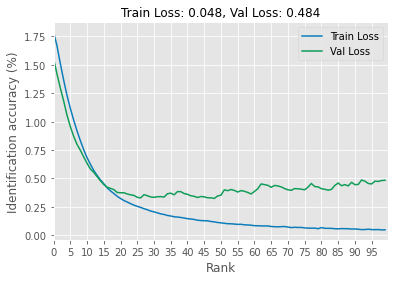

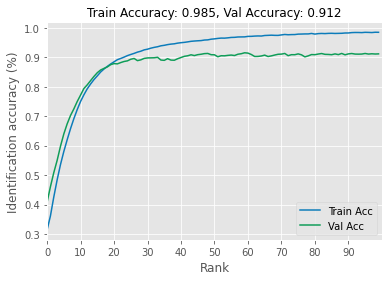

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import pickle
model3.save('Model_Texture_Alexnet.h5')
save_history(history3, 'hist1.bin')
history=load_history('hist1.bin')
plot_compare(history)

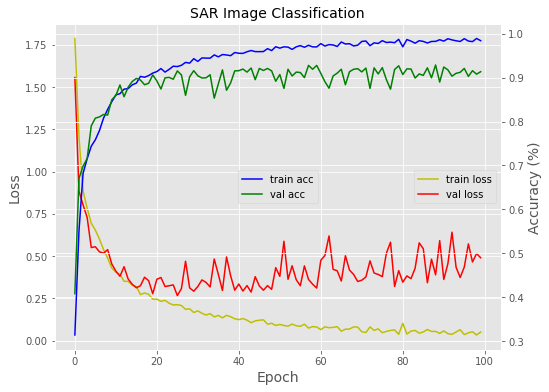

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(8,6))
acc_ax = loss_ax.twinx()

loss_ax.plot(history3.history['loss'], 'y', label='train loss')
loss_ax.plot(history3.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('Epoch',fontname='Times New Roman Bold', fontsize=14)
loss_ax.set_ylabel('Loss',fontname='Times New Roman Bold', fontsize=14)
loss_ax.legend(loc='right')

acc_ax.plot(history3.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history3.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('Accuracy (%)',fontname='Times New Roman Bold', fontsize=14)
acc_ax.set_title('SAR Image Classification',fontname='Times New Roman Bold', fontsize=14)
acc_ax.legend(loc='center')

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_hat = model3.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(y_hat)
print(cm)

68/68 [==============================] - 0s 4ms/step
[[1.1546679e-06 4.7031939e-05 8.4445099e-18 ... 5.2258493e-12
  3.7768597e-05 4.6948302e-01]
 [8.6127676e-07 4.9494030e-16 4.9482302e-17 ... 6.5150396e-10
  1.2257370e-30 1.5771692e-06]
 [5.5368469e-07 2.0895840e-04 1.9617650e-09 ... 9.2538234e-11
  3.0453804e-05 4.2276350e-03]
 ...
 [1.3169214e-27 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 6.6098789e-22]
 [1.5592638e-30 9.8023086e-18 1.0000000e+00 ... 5.6070471e-33
  0.0000000e+00 0.0000000e+00]
 [3.8600247e-05 2.6858062e-01 3.8886355e-06 ... 3.3209796e-13
  7.2313243e-01 1.8694283e-06]]
[[151   1   0   0   0   0   0   1   0   0]
 [ 23  57   3   0   6   0   0   0  16   0]
 [  0   5 214   1   0   0   3   0   2   0]
 [  0   1   8 187   2   0   3   7   2   0]
 [  5  10   0   2 146   0   1   0   3   6]
 [  2   0   0   0   0 293   0   0   0   1]
 [  1   0   1   4  14  22 256   0   4   1]
 [  0   0   0   1   0   0   0 293   0   7]
 [  1   6   0   0   4   0   0   0 207  

In [ ]:
from sklearn.metrics import jaccard_score
sim1 = jaccard_score(y_true, y_pred, average=None)
sim1

array([0.81182796, 0.4453125 , 0.90295359, 0.85779817, 0.73      ,
       0.91277259, 0.82580645, 0.94822006, 0.84146341, 0.88709677])

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.grid(False)
    plt.show()


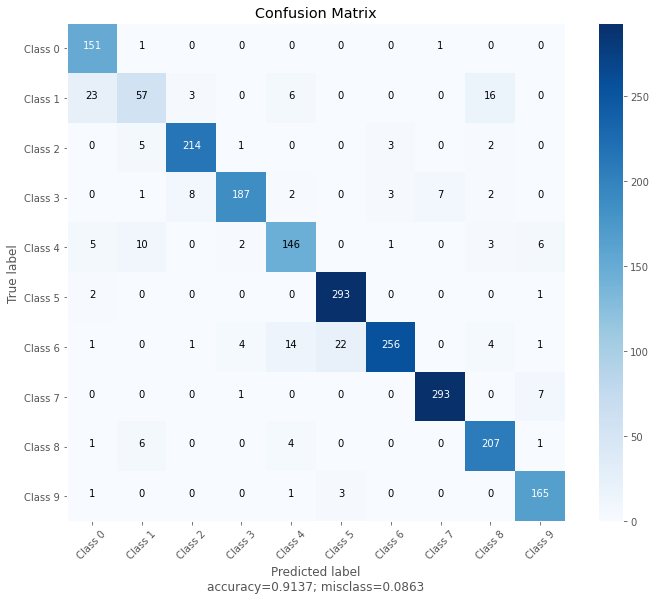

In [ ]:
plot_confusion_matrix(cm,
                      normalize    = False,
                      target_names= ['Class 0','Class 1','Class 2', 'Class 3', 'Class 4', 'Class 5','Class 6','Class 7','Class 8','Class 9'],
                      title        = "Confusion Matrix")

In [ ]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(model3.predict(x_test), axis=1)
y_true1 = np.argmax(y_test, axis=1)
y_true=y_true1.astype(np.int64)
target_names= ['Class 0','Class 1','Class 2', 'Class 3', 'Class 4', 'Class 5','Class 6','Class 7','Class 8','Class 9']
print(classification_report(y_true, y_pred,target_names=target_names))
print(confusion_matrix(y_true, y_pred))

68/68 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Class 0       0.82      0.99      0.90       153
     Class 1       0.71      0.54      0.62       105
     Class 2       0.95      0.95      0.95       225
     Class 3       0.96      0.89      0.92       210
     Class 4       0.84      0.84      0.84       173
     Class 5       0.92      0.99      0.95       296
     Class 6       0.97      0.84      0.90       303
     Class 7       0.97      0.97      0.97       301
     Class 8       0.88      0.95      0.91       219
     Class 9       0.91      0.97      0.94       170

    accuracy                           0.91      2155
   macro avg       0.89      0.89      0.89      2155
weighted avg       0.91      0.91      0.91      2155

[[151   1   0   0   0   0   0   1   0   0]
 [ 23  57   3   0   6   0   0   0  16   0]
 [  0   5 214   1   0   0   3   0   2   0]
 [  0   1   8 187   2   0   3   7   2   0]
 [  5  10   0   

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision (micro): %f" % precision_score(y_pred, y_true, average='micro'))
print("Recall (micro):    %f" % recall_score(y_pred, y_true, average='micro'))
print("F1 score (micro):  %f" % f1_score(y_pred, y_true, average='micro'), end='\n\n')

print("Precision (macro): %f" % precision_score(y_pred, y_true, average='macro'))
print("Recall (macro):    %f" % recall_score(y_pred, y_true, average='macro'))
print("F1 score (macro):  %f" % f1_score(y_pred, y_true, average='macro'), end='\n\n')

print("Precision (weighted): %f" % precision_score(y_pred, y_true, average='weighted'))
print("Recall (weighted):    %f" % recall_score(y_pred, y_true, average='weighted'))
print("F1 score (weighted):  %f" % f1_score(y_pred, y_true, average='weighted'),end='\n\n')

from sklearn.metrics import cohen_kappa_score
print("kappa_score(micro): %f" % cohen_kappa_score(y_pred, y_true))
print("kappa_score(macro):    %f" % cohen_kappa_score(y_pred, y_true))
print("kappa_score(weighted):  %f" % cohen_kappa_score(y_pred, y_true))

Precision (micro): 0.913689
Recall (micro):    0.913689
F1 score (micro):  0.913689

Precision (macro): 0.893927
Recall (macro):    0.894737
F1 score (macro):  0.891524

Precision (weighted): 0.921788
Recall (weighted):    0.913689
F1 score (weighted):  0.915623

kappa_score(micro): 0.903165
kappa_score(macro):    0.903165
kappa_score(weighted):  0.903165


In [ ]:
y_testpred = model3.predict(x_test)
pred_labels = []
for i in range(25):
    r = np.round(np.array(np.exp(y_hat[i])/sum(np.exp(y_hat[i]))),1).argmax()
    print(r)
    if r ==0 : pred_labels.append("0")
    elif r ==1: pred_labels.append("1")
    elif r ==2: pred_labels.append("2")
    elif r ==3: pred_labels.append("3")
    elif r ==4: pred_labels.append("4")
    elif r ==5: pred_labels.append("5")
    elif r ==6: pred_labels.append("6")
    elif r ==7: pred_labels.append("7")
    elif r ==8: pred_labels.append("8")
    elif r ==9: pred_labels.append("9")

68/68 [==============================] - 0s 4ms/step
4
5
6
0
3
4
2
2
7
8
7
3
5
9
7
3
4
8
6
5
0
0
8
5
3


In [ ]:
images = x_test[:25]
print(images.shape)
print(type(images))

(25, 64, 64, 1)
<class 'numpy.ndarray'>


(10, 64, 64, 1)


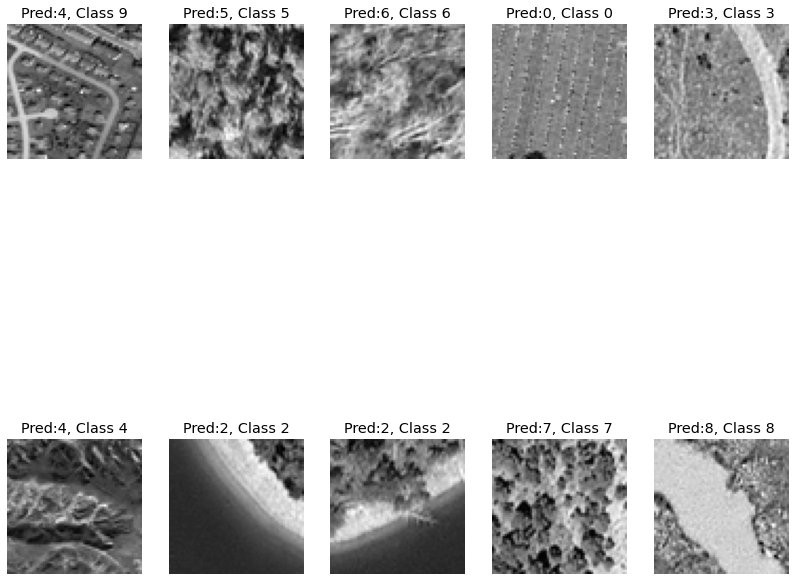

In [ ]:
#Multiple images parameters
import matplotlib.pyplot as plt
w=64
h=64
columns = 5
rows = 2
images = x_test[:10]
print(images.shape)
fig = plt.figure(figsize=(14, 14))
for m in range(1, columns*rows +1):
    img = images[m-1].reshape([64, 64])
    fig.add_subplot(rows, columns, m)
    plt.imshow(img,cmap='gray')
    plt.title("Pred:{}, Class {}".format(pred_labels[m-1], y_true[m-1]))
    #plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.axis('off')
    plt.grid(False)
plt.show()

68/68 [==============================] - 0s 4ms/step
(2155,) (2155, 10)
Found 1 incorrect labels


<ipython-input-92-64fbef888693>:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  incorrect = np.where(predicted_classes!=y_test)[0]


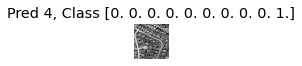

In [ ]:
predicted_classes = model3.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
print(predicted_classes.shape,y_test.shape)
incorrect = np.where(predicted_classes!=y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(64,64), interpolation='none', cmap='gray')
    plt.title("Pred {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.grid(False)
    plt.axis('off')
    plt.tight_layout()

<ipython-input-93-a9ad625c54a5>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  correct = np.where(predicted_classes==y_test)[0]


Found 0 correct labels
[4 5 6 0 3 4 2 2 7 8 7 3 5 9 7 3 4 8 6 5 0 0 8 5 3 3 0 2 8 0 8 3 6 6 6 9 8
 9 3 5 3 9 6 5 5 5 3 7 7 4 6 2 9 5 6 7 7 0 5 2 0 5 4 7 2 5 7 8 7 7 7 7 6 8
 5 0 3 3 6 3 6 5 3 4 5 3 5 6 8 8 2 9 2 9 2 7 5 1 4 7]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 

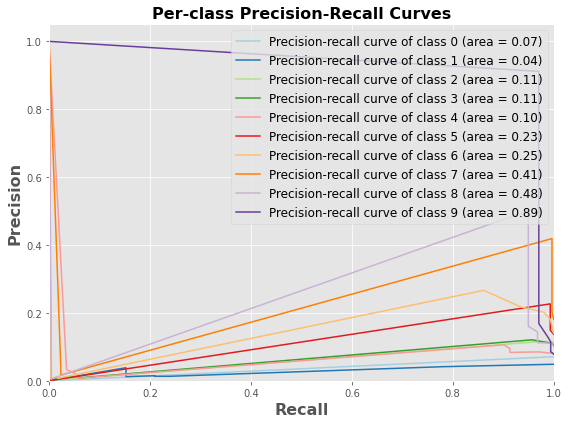

In [ ]:
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(64,64), interpolation='none', cmap='gray')
    plt.title("Pred {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.grid(False)
    plt.axis('off')
    plt.tight_layout()
print(predicted_classes[0:100])
print(y_test[0:100])
from sklearn.metrics import precision_recall_curve, average_precision_score
precision = dict()
recall = dict()
average_precision = dict()
for i in range(10):
    t = y_test[:, i]
    s = y_pred
    precision[i], recall[i], _ = precision_recall_curve(t, s)
    average_precision[i] = average_precision_score(t, s)
# Plot Precision-Recall curve for each class
colors = ('#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928')
fig, ax = plt.subplots(figsize=(8,6))
#ax.set_axis_bgcolor('white')
for cl, co in zip(range(10), colors):
    plt.plot(recall[cl], precision[cl], color=co,
             label='Precision-recall curve of class {} (area = {:.2f})'.format(cl, average_precision[cl]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', size=16, weight='bold')
plt.ylabel('Precision', size=16, weight='bold')
plt.title('Per-class Precision-Recall Curves', size=16, weight='bold')
plt.legend(loc="upper right", prop={'size':12})
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_value, mae_value = model3.evaluate(x_test, y_testpred, verbose=0)
print("Mean Squared Error (MSE)=",mse_value)
print("Mean Absolute Error (MAE)=",mae_value)
print("Mean Squared Error (MSE)=",mean_squared_error(y_testpred, y_test))
print("Mean Absolute Error (MAE)=",mean_absolute_error(y_testpred, y_test))
print ("R^2 is: \n", r2_score(y_test, y_testpred))
print ('RMSE is: \n', np.sqrt(mean_squared_error(y_test, y_testpred)))

Mean Squared Error (MSE)= 0.06859093904495239
Mean Absolute Error (MAE)= 1.0
Mean Squared Error (MSE)= 0.01435372
Mean Absolute Error (MAE)= 0.01806843
R^2 is: 
 0.8107542796897919
RMSE is: 
 0.11980701
